<h1 style='color: blue; font-weight:bold; text-align:center'>DATA ANALYTICS PROJECT</h1>
<h2 style='color: maroon'>Title Project: 📊Family Income and Expenditure💰</h2>
<h2 style='color: gold'>Analyst: Christian Orinday</h2>
<h2 style='color: gold'>Analyst: Brian Perez</h2>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

income_data = pd.read_csv('Family Income and Expenditure.csv')

<h1>Insight 1: Total Household Income vs Total Food Expenditure</h1>

Correlation between income and food expenditure: 0.66
Mean Household Income: ₱247,555.58
Median Household Income: ₱164,079.50
Mean Food Expenditure: ₱85,099.16
Median Food Expenditure: ₱72,985.50


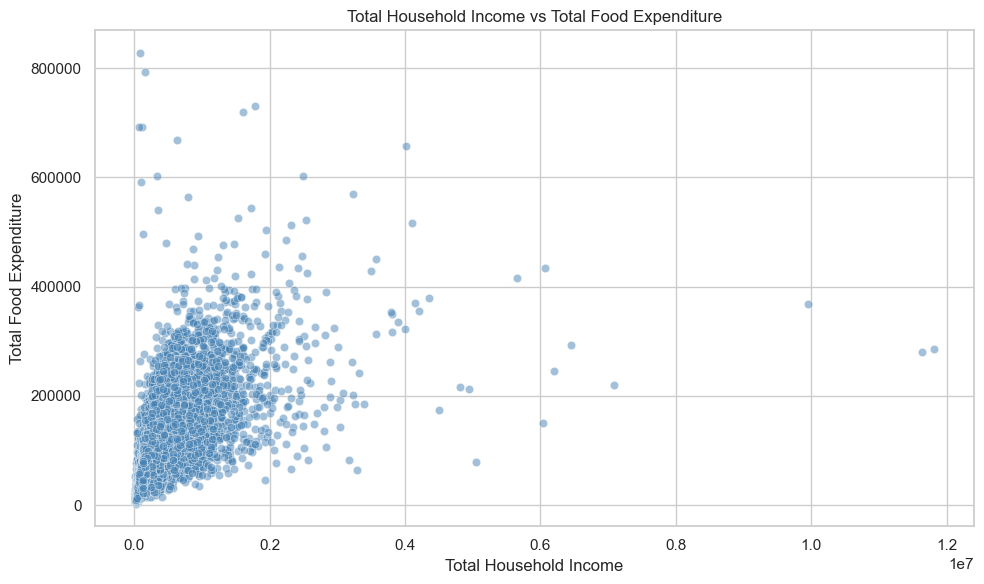

In [2]:
relevant_columns = ['Total Household Income', 'Total Food Expenditure']
df_cleaned = income_data[relevant_columns].dropna()

correlation = df_cleaned['Total Household Income'].corr(df_cleaned['Total Food Expenditure'])
mean_income = df_cleaned['Total Household Income'].mean()
median_income = df_cleaned['Total Household Income'].median()
mean_food = df_cleaned['Total Food Expenditure'].mean()
median_food = df_cleaned['Total Food Expenditure'].median()

print(f"Correlation between income and food expenditure: {correlation:.2f}")
print(f"Mean Household Income: ₱{mean_income:,.2f}")
print(f"Median Household Income: ₱{median_income:,.2f}")
print(f"Mean Food Expenditure: ₱{mean_food:,.2f}")
print(f"Median Food Expenditure: ₱{median_food:,.2f}")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x='Total Household Income',
    y='Total Food Expenditure',
    alpha=0.5,
    color='steelblue'
)
plt.title('Total Household Income vs Total Food Expenditure')
plt.xlabel('Total Household Income')
plt.ylabel('Total Food Expenditure')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3>The scatterplot shows a <span style='color:maroon; font-weight:bold'>moderately strong positive correlation of 0.66</span> between <span style='color:blue; font-weight:bold'>total household income and total food expenditure</span>. This indicates that as household income increases, food expenditure also tends to rise.<br><br> The mean household income is <span style='color:green; font-weight:bold'>₱247,555.58</span>, while the median is <span style='color:green; font-weight:bold'>₱164,079.50</span>, suggesting that the income distribution is skewed to the right, with some households earning significantly more than others. Similarly, the mean food expenditure is <span style='color:green; font-weight:bold'>₱85,099.16</span>, and the median is <span style='color:green; font-weight:bold'>₱72,985.50</span>, showing a similar skew in spending. These differences between the mean and median suggest income and spending are unevenly distributed.<br><br> The scatter plot further confirms the correlation, showing an upward trend, though there is noticeable variation in food spending at higher income levels. This implies that while income influences food expenditure, other factors—such as household size, lifestyle, or personal priorities—also play a significant role.</h3>

<h1>Insight 2: Regional Comparison of Average Household Income</h1>

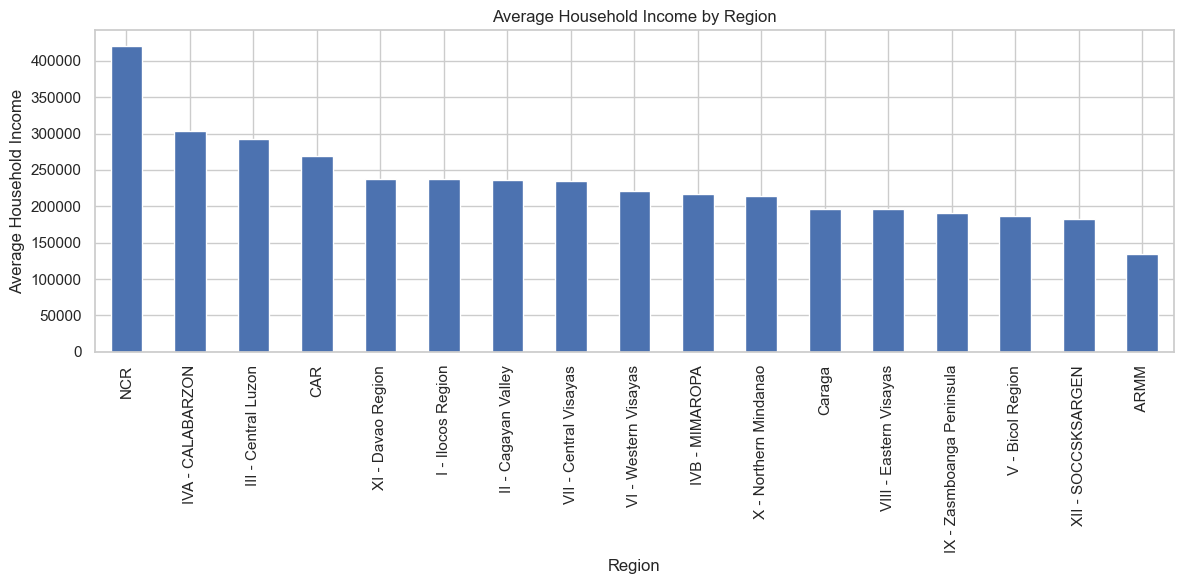

In [23]:
import matplotlib.pyplot as plt

income_data.groupby('Region')['Total Household Income'].mean()\
    .sort_values(ascending=False)\
    .plot(kind='bar', figsize=(12,6), title='Average Household Income by Region')


plt.ylabel('Average Household Income')  # Optional: Add y-axis label
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


<h3>This barplot <span style='color:maroon; font-weight:bold'>illustrates the variation in average household income across different regions</span>.<br><br> <span style='color:blue; font-weight:bold'>NCR</span> stands out with a significantly higher average income, exceeding <span style='color:green; font-weight:bold'>₱400,000</span>, which is noticeably above all other regions. Following that, <span style='color:blue; font-weight:bold'>4A - Calabarzon</span> have averages around <span style='color:green; font-weight:bold'>₱300,000</span>, while most others range between <span style='color:green; font-weight:bold'>₱200,000 to ₱270,000</span>. <br><br>The lowest average income is just above <span style='color:green; font-weight:bold'>₱150,000</span>, highlighting a wide income gap among regions. This disparity suggests that economic opportunities and living standards may vary greatly depending on location, with wealth likely being concentrated in a few urban or highly developed areas, while others lag behind.</h3>

<h1>Insight 3: Median Food Expenditure by Region</h1>

<Axes: title={'center': 'Median Food Expenditure by Region'}, xlabel='Region'>

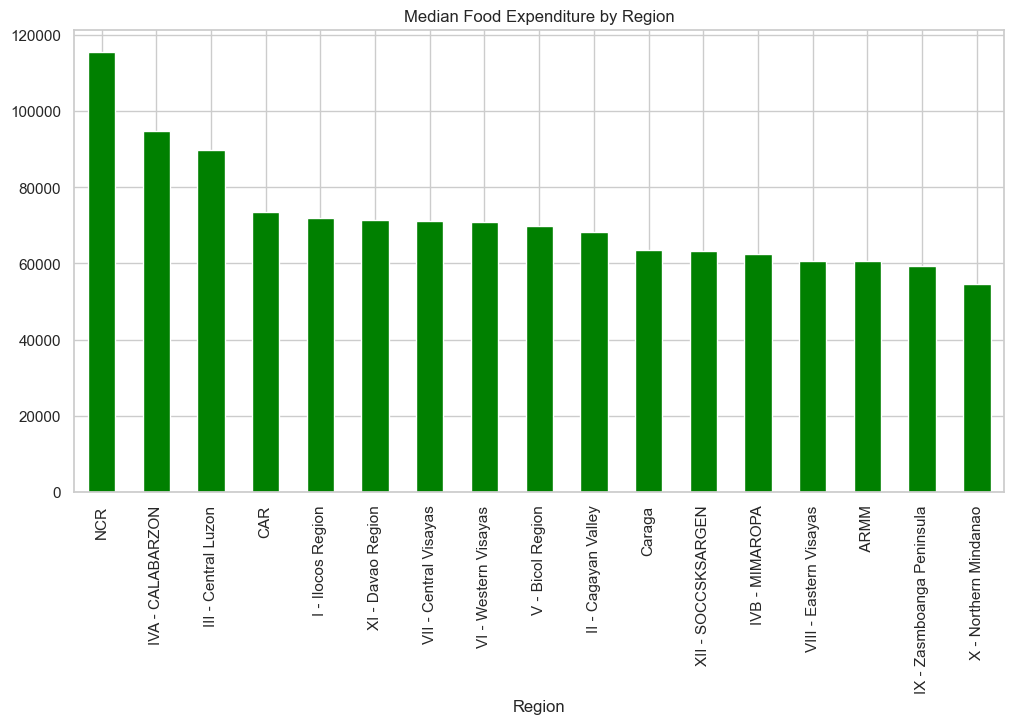

In [4]:
income_data.groupby('Region')['Total Food Expenditure'].median().sort_values(ascending=False).plot(kind='bar', color='green', figsize=(12,6), title='Median Food Expenditure by Region')


<h3>This Barplot shows that <span style='color:blue; font-weight:bold'>NCR</span> has the highest median food expenditure, significantly above other regions, indicating higher living costs or purchasing power. Conversely, <span style='color:blue; font-weight:bold'>Northern Mindanao</span> records the lowest, suggesting lower food expenses possibly due to lower income levels or cost of living.<br><br> The steep drop between the top 3 regions and the rest implies economic disparities across regions in terms of food spending.</h3>

<h1>Insight 4: Proportion of Income Spent on Food</h1>

<Axes: xlabel='Food to Income Ratio', ylabel='Count'>

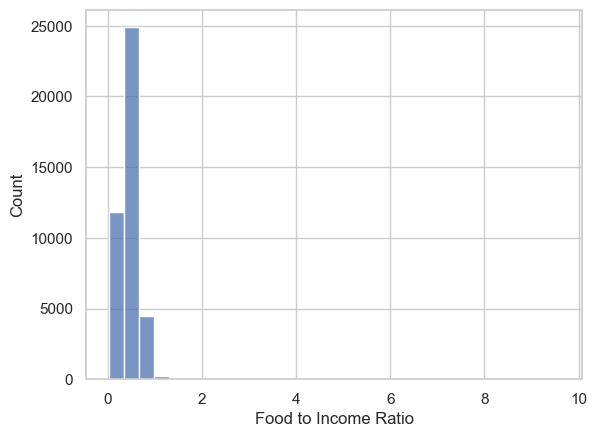

In [5]:
income_data['Food to Income Ratio'] = income_data['Total Food Expenditure'] / income_data['Total Household Income']
sns.histplot(income_data['Food to Income Ratio'], bins=30)


<h3>This histogram shows how much of people's income is spent on food. Most people spend only a small part of their income on food less than their total income. <br><br>Very few people spend more than they earn on food. This means that, for most, food is not the biggest expense compared to what they earn.
</h3>

<h1>Insight 5:  Average Meat Expenditure by Income Level</h1>

<Axes: xlabel='Income Group'>

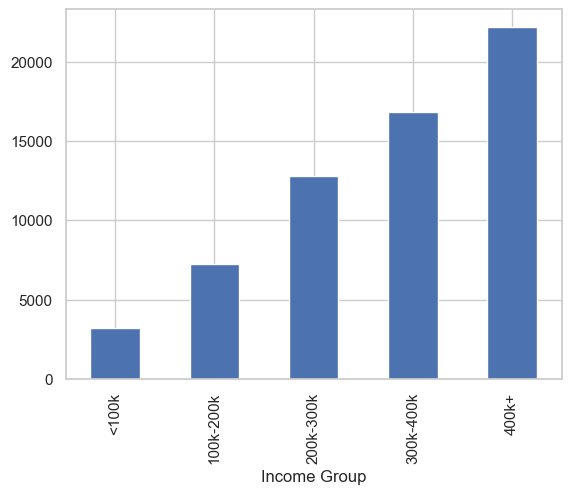

In [6]:
bins = [0, 100000, 200000, 300000, 400000, 1000000]
labels = ['<100k', '100k-200k', '200k-300k', '300k-400k', '400k+']
income_data['Income Group'] = pd.cut(income_data['Total Household Income'], bins=bins, labels=labels)
income_data.groupby('Income Group')['Meat Expenditure'].mean().plot(kind='bar')


<h3>This barplot shows the distribution of data across different income groups. As the income group increases, the number of individuals or observations in that group also increases. <br><br>The highest income group has the most data points, indicating that more people fall into higher-income brackets. Conversely, the lowest income group has the fewest data points, suggesting fewer people in this category.
</h3>

<h1>Insight 6: Correlation Heatmap of All Expenditures</h1>

<Axes: >

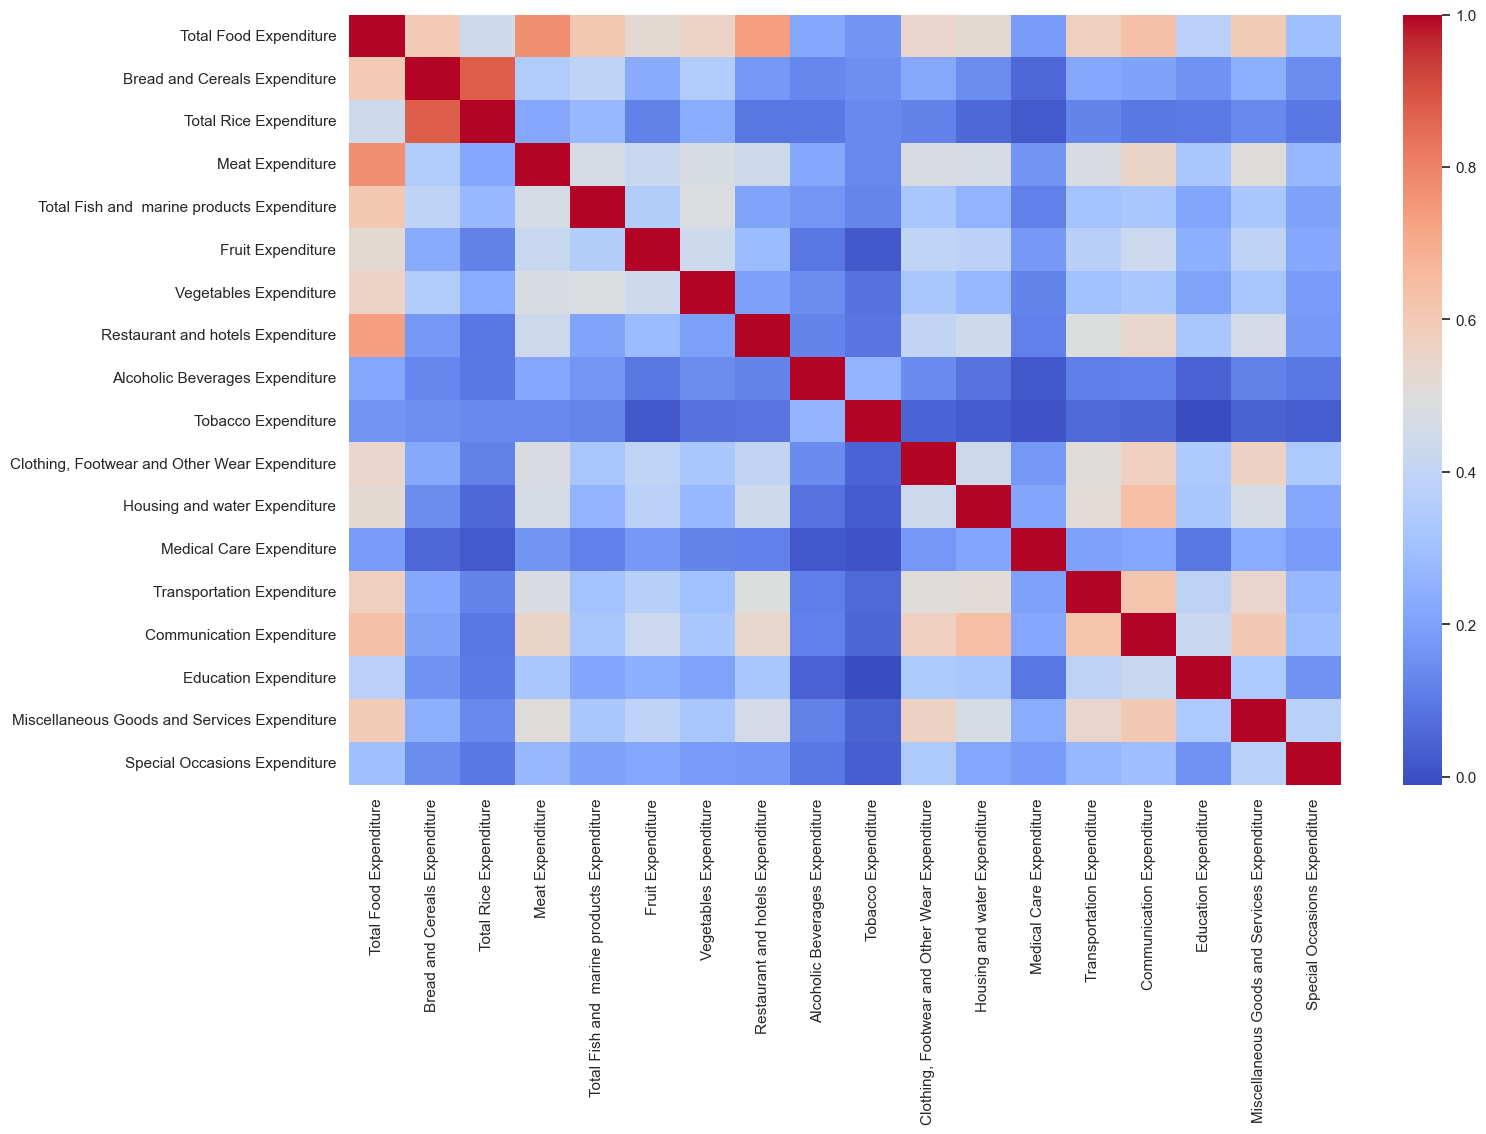

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(income_data.filter(like='Expenditure').corr(), cmap='coolwarm', annot=False)


<h3>This heatmap shows the correlation between different types of household expenditures. The colors range from blue (weak or no correlation) to red (strong positive correlation).</h3><br>
<h4>Strong correlations (dark red) are seen between similar or related categories, such as:</h4>
<li><span style='color:darkred; font-weight:bold'>Total Food Expenditure and Bread and Cereals Expenditure, Meat, Rice, and Fish</span></spanTotal> suggesting that as total food spending increases, spending on these individual items also increases.</li>
<li><span style='color:darkred; font-weight:bold'>Housing and Water Expenditure and Transportation or Medical Care Expenditure</span> also show moderate to strong relationships.</li>
<h4>Weak or no correlation (blue areas) are seen between unrelated categories:</h4>
<li><span style='color:blue; font-weight:bold'>Tobacco Expenditure and Education Expenditure</span> are barely correlated.</li>
<li><span style='color:blue; font-weight:bold'>Alcoholic Beverages or Tobacco</span> have low correlation with most other categories, possibly indicating these are more individually driven choices rather than linked to overall household spending trends.</li>


<h1>Insight 7: Average Education Expenditure by Household Head's Education Level</h1>

<Axes: xlabel='Household Head Highest Grade Completed'>

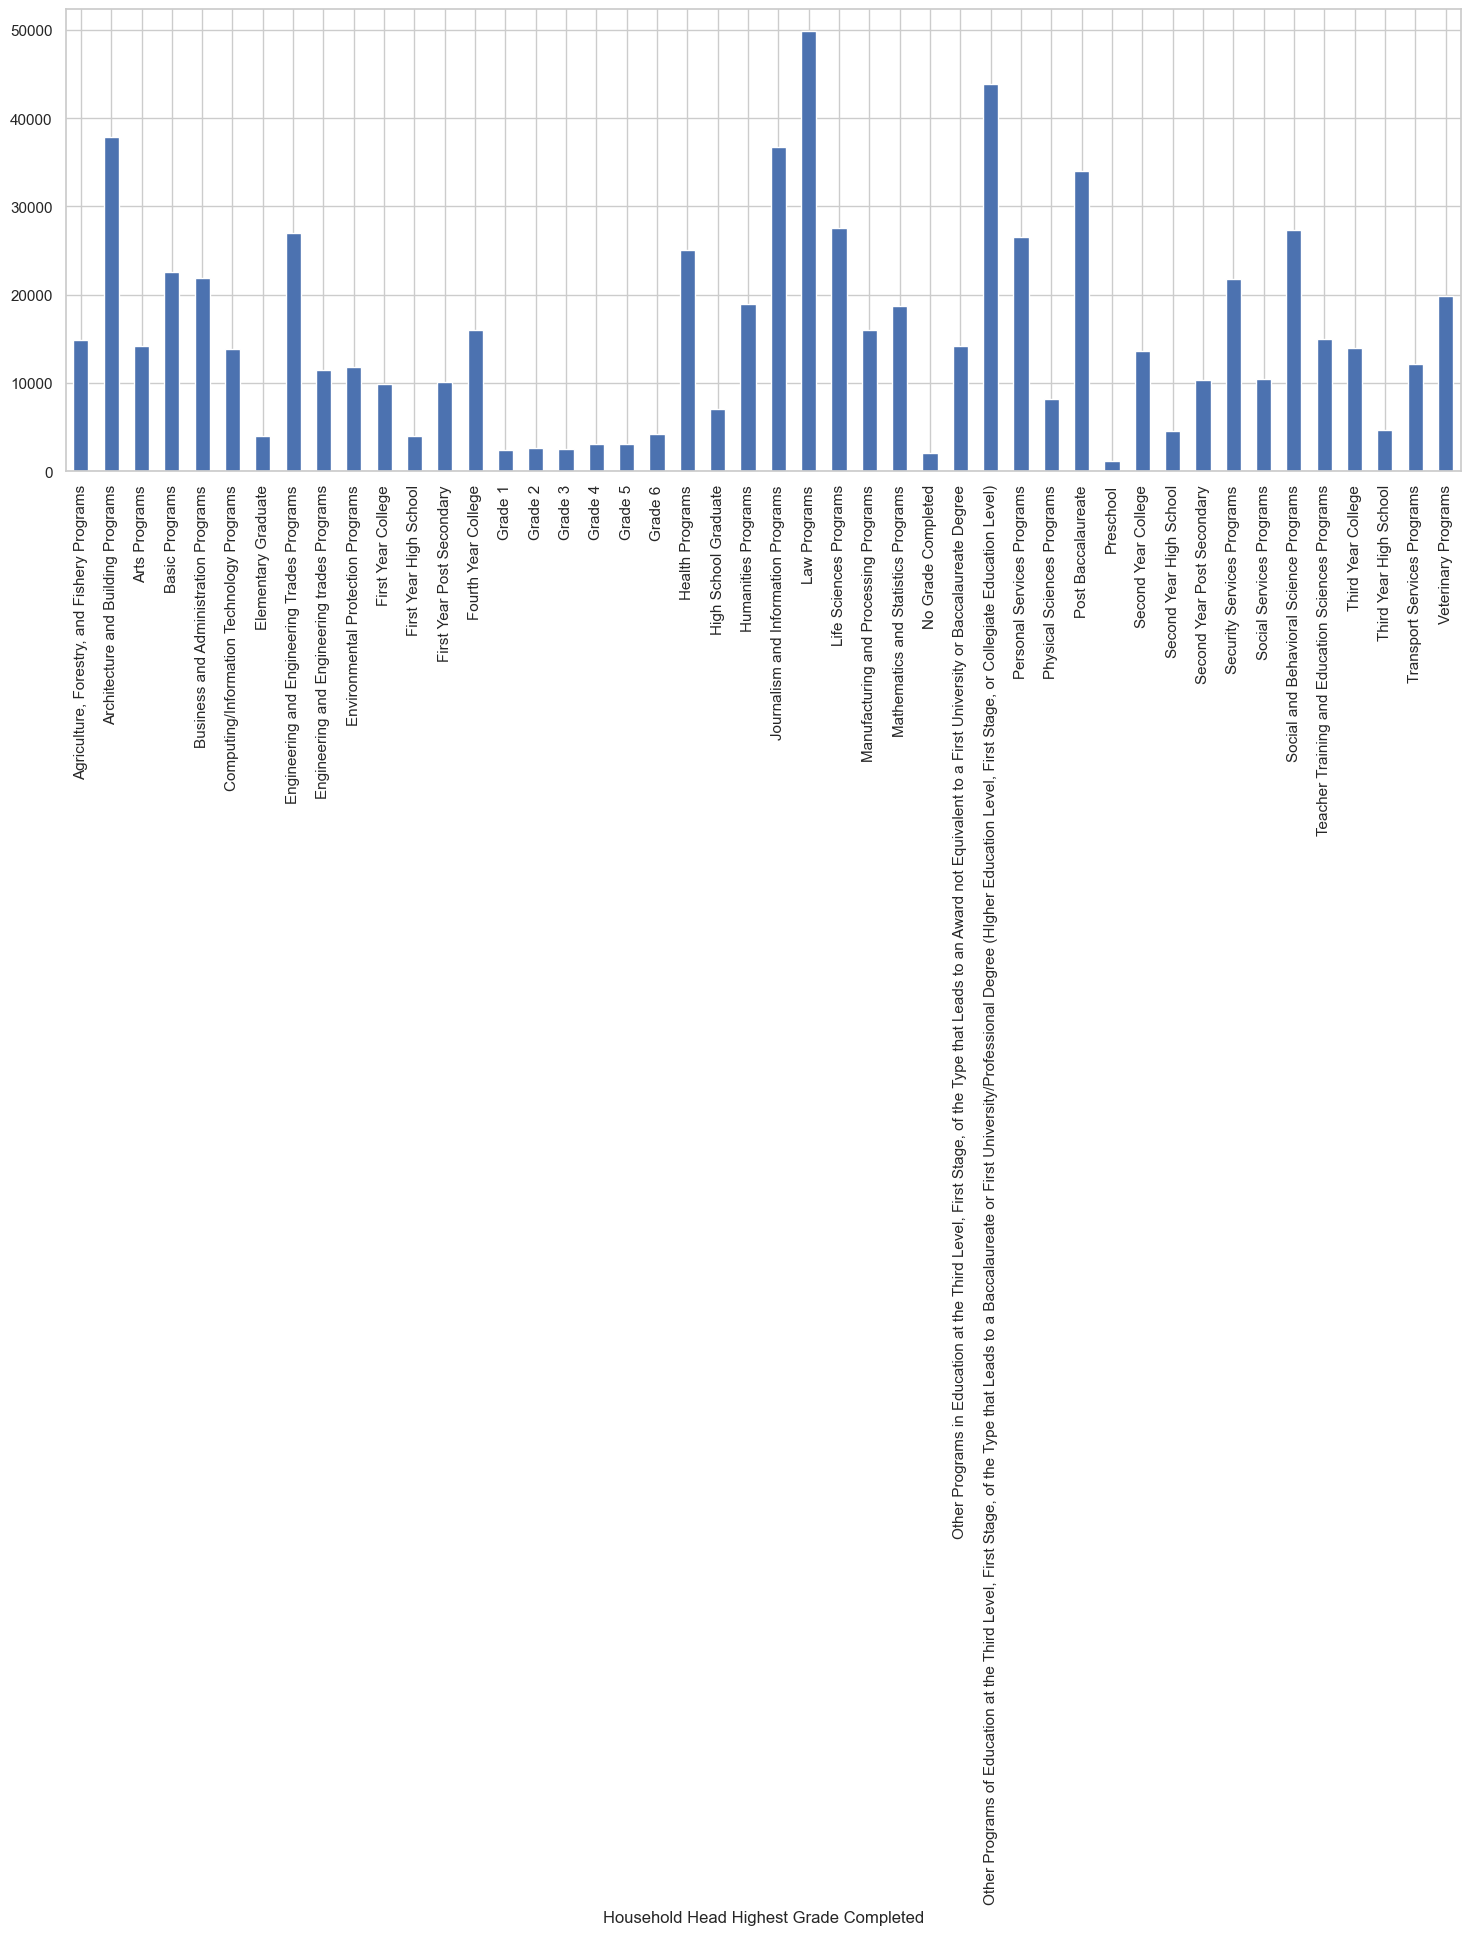

In [24]:
income_data.groupby('Household Head Highest Grade Completed')['Education Expenditure'].mean().plot(kind='bar', figsize=(18,6))

<h3>This Barplot shows that Law Programs have the most students, with <span style='color:blue; font-weight:bold'>nearly 50,000 participants</span>, showing a strong interest in this field. Personal Services and Architecture & Building Programs also have high numbers, with over 40,000 and 38,000 students.<br><br>Programs like Forestry and Fishery, Engineering Trades, and Humanities have a <span style='color:blue; font-weight:bold'>moderate number of participants between 20,000 and 30,000.</span><br><br>Post Baccalaureate and Fourth Year College have very low numbers, suggesting fewer people are enrolled at these stages. Grade 1 to 6 levels also show very low values, meaning the chart likely focuses on adult or college-level education.<br><br>Lastly, fields like Information Technology and Environmental Protection have relatively low enrollment, which could mean there's less interest or fewer opportunities in these areas.</h3>

<h1>Insight 8: Food vs Alcohol Expenditure</h1>

<Axes: xlabel='Total Food Expenditure', ylabel='Alcoholic Beverages Expenditure'>

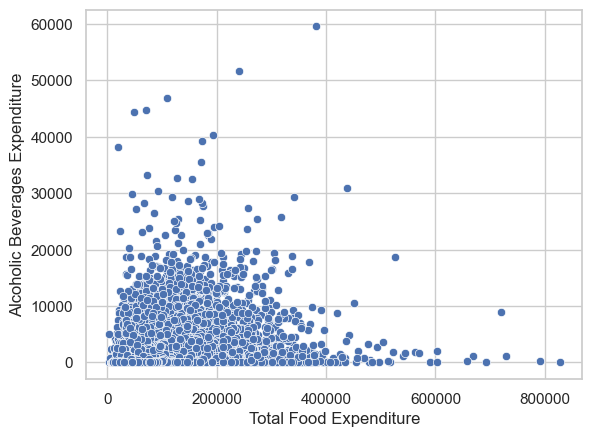

In [9]:
sns.scatterplot(data=income_data, x='Total Food Expenditure', y='Alcoholic Beverages Expenditure')

<h3>This scatter plot shows how people’s spending on food relates to their spending on alcoholic drinks.</h3>
<li>Most people spend less than <span style='color:green; font-weight:bold'>200,000</span> on food and less than <span style='color:green; font-weight:bold'>10,000</span> on alcohol.</li>
<li>When people spend more on food, it doesn’t always mean they also spend more on alcohol.</li>
<li>There are a few people who spend a lot on alcohol <span style='color:green; font-weight:bold'>(over 40,000 or even 60,000)</span>, but these cases are rare.</li>
<li>Even those who spend a lot on food usually have low or average alcohol expenses.</li>

<h1>Insight 9: Median Clothing Expenditure by Gender of Household Head</h1>

<Axes: xlabel='Household Head Sex'>

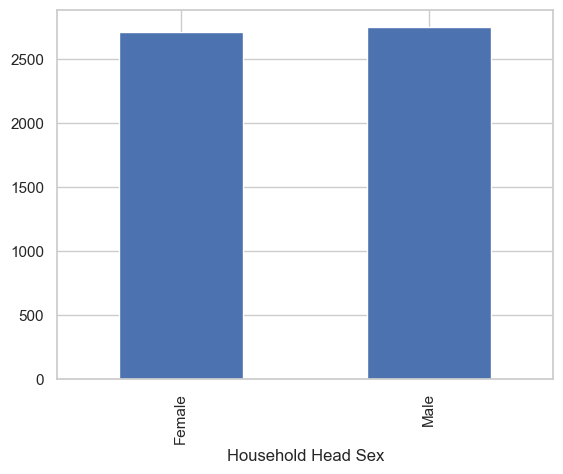

In [10]:
income_data.groupby('Household Head Sex')['Clothing, Footwear and Other Wear Expenditure'].median().plot(kind='bar')

<h3>The bar plot shows the Clothing, Footwear, and Other Wear Expenditure based on the sex of the household head. <br><br>It reveals that male household heads spend slightly more around 2,800 compared to female household heads, who spend around 2,700.</h3>

<h1>Insight 10: Distribution of House Floor Area</h1>

<Axes: xlabel='House Floor Area', ylabel='Count'>

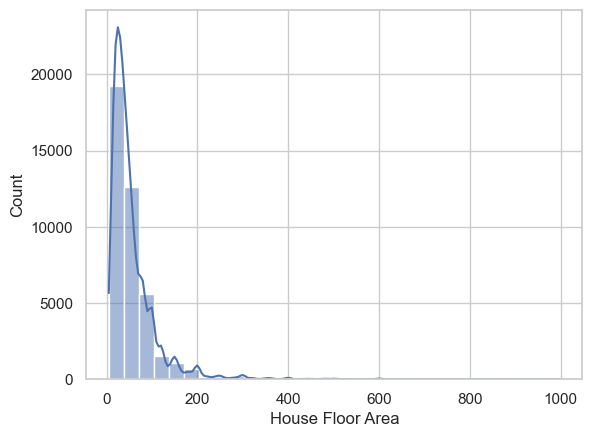

In [11]:
sns.histplot(income_data['House Floor Area'], bins=30, kde=True)

<h3>This histogram with a density line shows the distribution of house floor area sizes.</h3>
<li>Most houses are small, with the majority having a floor area <span style='color:blue; font-weight:bold'>between 0 and 100 square meters.</span> The highest number of houses (the peak) is found <span style='color:blue; font-weight:bold'>below 50 square meters.</span></li>
<li>The graph is right-skewed, which means that while most houses are small, there are a few much larger ones.</li>
<li>Beyond 100 square meters, the number of houses quickly drops.</li>
<li>Houses larger than <span style='color:blue; font-weight:bold'>200 square meters are very rare</span>, and anything close to 1000 square meters is considered an outlier in this data.</li>

<h1>Insight 11: Average Medical Care Spending by Age Group of Household Head</h1>

<Axes: xlabel='Age Group'>

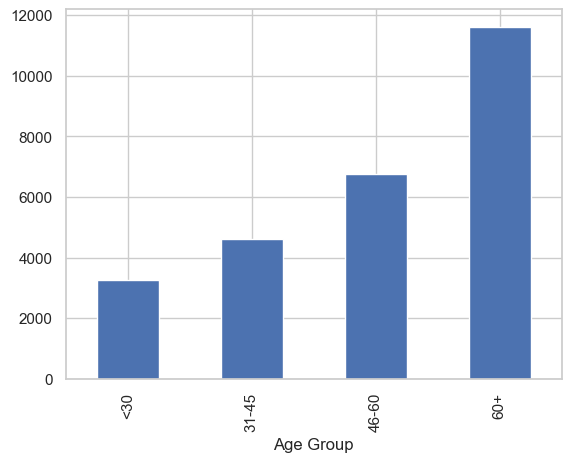

In [12]:
income_data['Age Group'] = pd.cut(income_data['Household Head Age'], bins=[0,30,45,60,100], labels=['<30','31-45','46-60','60+'])
income_data.groupby('Age Group')['Medical Care Expenditure'].mean().plot(kind='bar')


<h3>The bar plot shows the average medical care expenditure across different age groups.</h3>
<li>The 60+ age group spends the most on medical care, averaging between 10,000 and 12,000, likely due to age-related health needs.</li>
<li>The 46–60 group follows, with spending between 6,000 and 8,000.</li>
<li>Those aged 31–45 spend around 4,000 to 6,000, while the under-30 group spends the least, with an average between 2,000 and 4,000.</li>

<h1>Insight 12: Mean Communication Spending per Region</h1>

<Axes: ylabel='Region'>

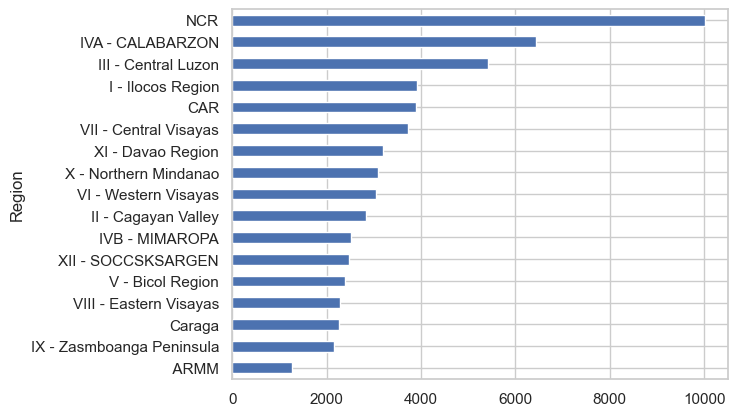

In [13]:
income_data.groupby('Region')['Communication Expenditure'].mean().sort_values().plot(kind='barh')


<h3>The chart shows a clear difference in values across regions. The National Capital Region (NCR) stands out with the highest value, much higher than any other region. On the other hand, the Autonomous Region in Muslim Mindanao (ARMM) has the lowest value. <br><br>The rest of the regions fall somewhere in between, showing moderate and varied values. </h3>

<h1>Insight 13: Relationship Between Household Size and Food Spending</h1>

<Axes: xlabel='Total Number of Family members', ylabel='Total Food Expenditure'>

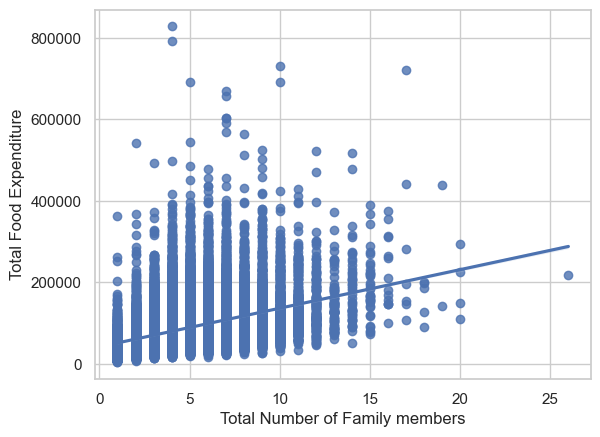

In [14]:
sns.regplot(x='Total Number of Family members', y='Total Food Expenditure', data=income_data)

<h3>The scatter plot shows a slightly positive relationship between household size and total food expenditure. This means that, in general, larger families tend to spend more on food. However, the relationship is not very strong, as there's a wide range of food spending even among households with the same number of members.</h3>

<h1>Insight 14: Impact of Having Internet-Related Devices on Education Spending</h1>

<Axes: xlabel='Total Digital Devices', ylabel='Education Expenditure'>

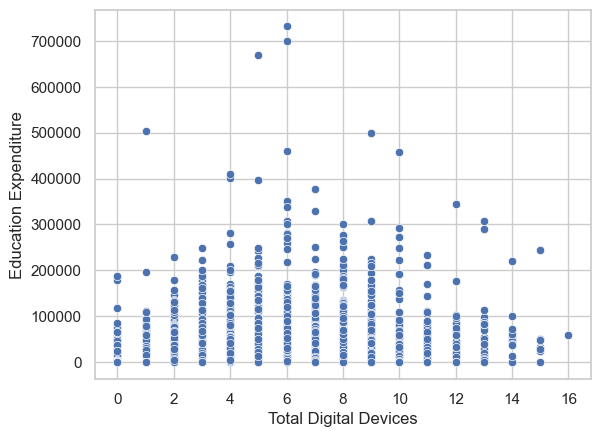

In [15]:
income_data['Total Digital Devices'] = (
    income_data['Number of Cellular phone'] +
    income_data['Number of Personal Computer']
)
sns.scatterplot(x='Total Digital Devices', y='Education Expenditure', data=income_data)


<h3>The scatter plot shows the relationship between the number of internet-related devices (like cellphones and computers) and education expenditure. While there is a slight trend suggesting that households with more devices tend to spend more on education, the pattern is scattered. This means the connection isn’t very strong, and education spending varies a lot even among households with the same number of devices.</h3>

<h1>Insight 15: Pie Chart: Agricultural vs Non-Agricultural Household</h1>

<Axes: ylabel='count'>

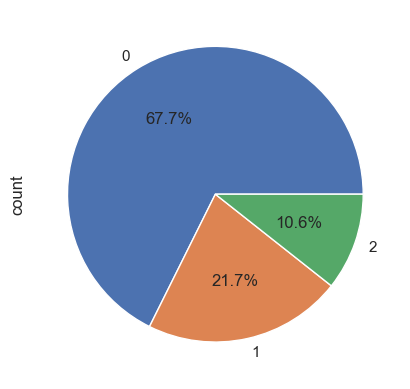

In [16]:
income_data['Agricultural Household indicator'].value_counts().plot.pie(autopct='%1.1f%%')

<h3>The pie chart shows that most households are non-agricultural, making up 67.7% of the total. Agricultural households account for a significant portion at 21.7%, while the smallest group, at 10.6%, falls under another category.</h3>

<h1>Insight 16: Most Common Occupation of Household Head</h1>

<Axes: xlabel='Household Head Occupation'>

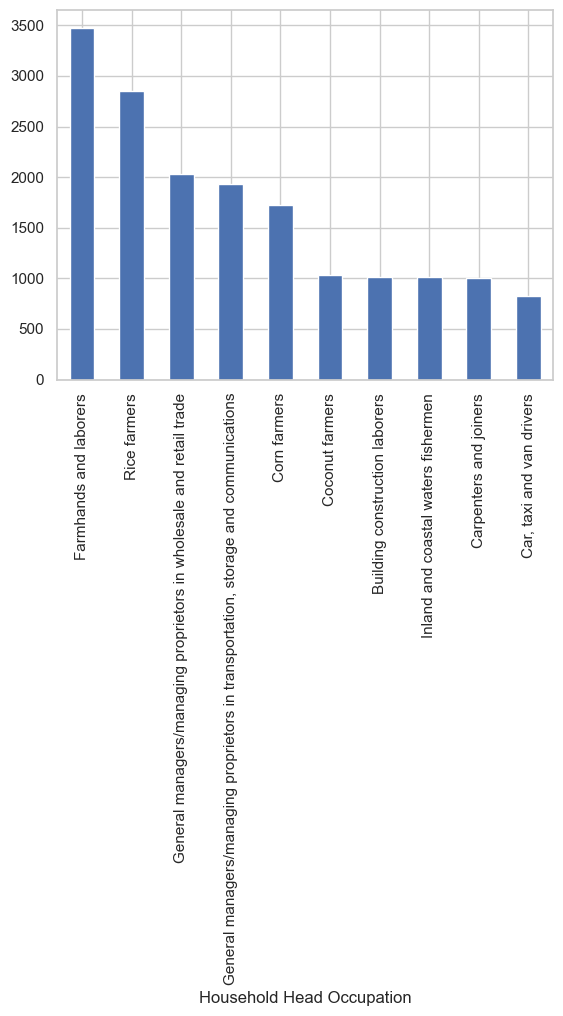

In [17]:
income_data['Household Head Occupation'].value_counts().head(10).plot(kind='bar')


<h3>The bar chart shows that "Service and shop sales workers" are the most common occupation among household heads, standing out significantly from the rest. This is followed by "Farmers, livestock raisers, and fishermen." The other occupations have a much lower number of household heads in comparison.</h3>

<h1>Insight 17: Compare Total Rice Expenditure Across Regions</h1>

<Axes: xlabel='Total Rice Expenditure', ylabel='Region'>

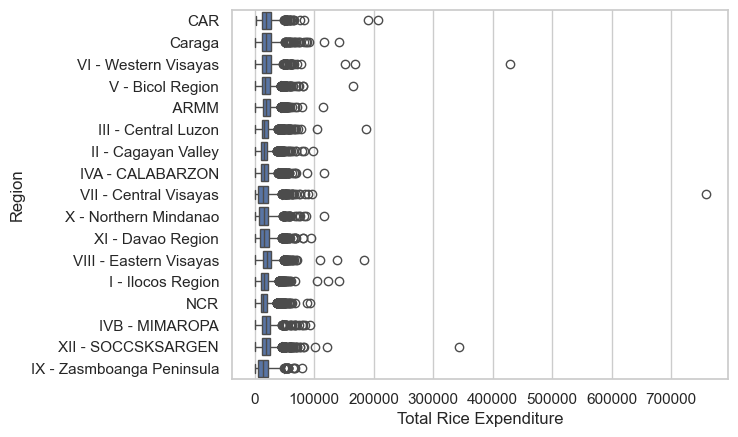

In [25]:
sns.boxplot(x='Total Rice Expenditure', y='Region', data=income_data)

<h3>The box plots compare total rice expenditure across different regions. They show that some regions spend more on rice on average (higher medians) than others. There are also differences in how spread out the spending is, with certain regions showing greater variation and the presence of outliers, indicating that spending habits on rice can vary widely between regions.</h3>

<h1>Insight 18: Trend "More Bedrooms vs Higher Income"</h1>

<Axes: xlabel='Number of bedrooms', ylabel='Total Household Income'>

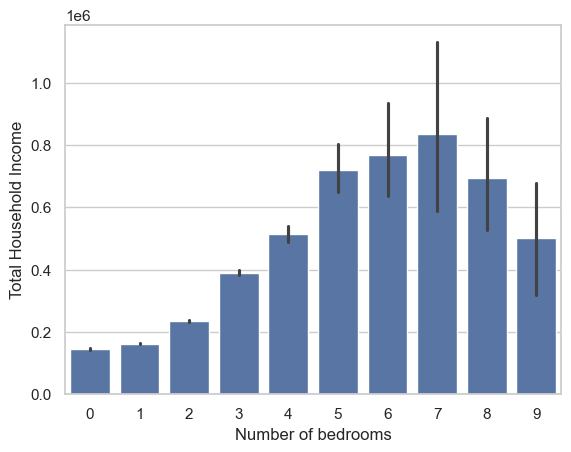

In [19]:
sns.barplot(x='Number of bedrooms', y='Total Household Income', data=income_data)

<h3>The barplot shows a trend where household income generally increases as the number of bedrooms rises, peaking around 7 bedrooms. After that point, the income slightly decreases. The barplot also reveal that households with the same number of bedrooms can have quite different income levels, indicating variability within each group.</h3>

<h1>Insight 19: Income Comparison by Marital Status</h1>

<Axes: xlabel='Total Household Income', ylabel='Household Head Marital Status'>

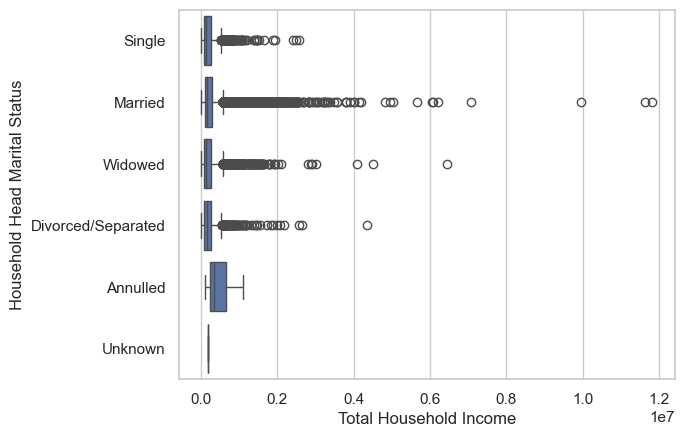

In [26]:
sns.boxplot(x='Total Household Income', y='Household Head Marital Status', data=income_data)

<h3>The box plots show how total household income varies based on the marital status of the household head. Some groups have higher median incomes, while others show greater income differences within the group. The presence of outliers also suggests that a few households earn significantly more or less than the rest in each category.</h3>

<h1>Insight 20: Income Difference Between Households With and Without a Car</h1>

<Axes: title={'center': 'Income: Car Owners vs Non-Owners'}, xlabel='Number of Car, Jeep, Van'>

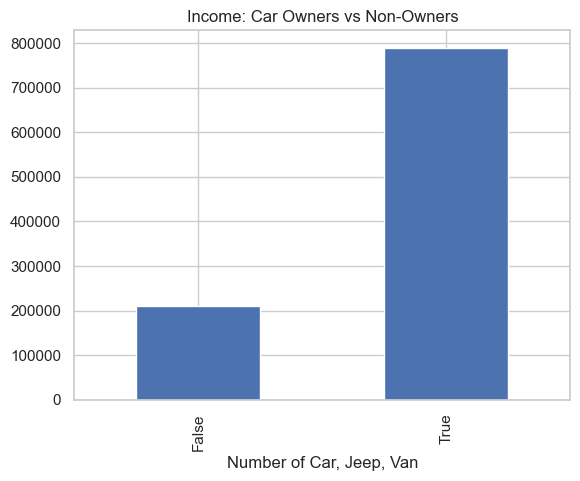

In [21]:
car_owners = income_data.groupby(income_data['Number of Car, Jeep, Van'] > 0)['Total Household Income'].mean()
car_owners.plot(kind='bar', title='Income: Car Owners vs Non-Owners')

<h3>The bar chart shows the average total household income for people who own a car and those who don’t. It clearly shows that households with at least one car, jeep, or van earn much more on average than households without any vehicle.</h3>